In [55]:
from importlib import reload

In [56]:
reload(den)

<module 'src.density' from 'C:\\Users\\ugur.eren\\Python Codes\\cefis2\\src\\density.py'>

In [1]:
import pandas as pd
import numpy as np
import src.density as den
import src.graphic as graph

# Veri Okunuyor

In [2]:
cols = ['time_period','duration','amplitude']
veri = pd.read_csv('6AU8_6BU8.csv',usecols=cols, index_col = 0)

In [4]:
data = veri.loc["18:00:00"]

In [26]:
data.head(6)

,duration,amplitude
time_period,,
18:00:00,3.0,-11.25
18:00:00,9.0,10.00
18:00:00,2.0,-6.25
18:00:00,2.0,6.25
18:00:00,52.0,-6.25
18:00:00,1.0,5.00


---

# Aralık Oluşturuluyor

### Aralık sayısı, toplamda 100 adet olacak şekilde aşağıdaki gibi oluşturulur:

In [6]:
range_creator = den.Interval(range_method='interval')

In [15]:
range_data =  range_creator.convert_range(data,100)

In [18]:
range_data.head(6)

,duration,amplitude
time_period,,
18:00:00,"(1.0, 5.192]","(-11.42, -11.08]"
18:00:00,"(5.192, 9.384]","(9.716, 10.057]"
18:00:00,"(1.0, 5.192]","(-6.307, -5.966]"
18:00:00,"(1.0, 5.192]","(5.966, 6.307]"
18:00:00,"(51.303, 55.495]","(-6.307, -5.966]"
18:00:00,"(1.0, 5.192]","(4.943, 5.284]"


### Aralık genişliği 10 olacak şekilde aşağıdaki gibi oluşturulur:

In [20]:
range_creator_with_width = den.Interval(range_method='width')

In [23]:
range_data_w = range_creator_with_width.convert_range(data,10)

In [24]:
range_data_w.head(6)

,duration,amplitude
time_period,,
18:00:00,"(1.0, 11.0]","(-13.125, -3.125]"
18:00:00,"(1.0, 11.0]","(6.875, 16.875]"
18:00:00,"(1.0, 11.0]","(-13.125, -3.125]"
18:00:00,"(1.0, 11.0]","(-3.125, 6.875]"
18:00:00,"(51.0, 61.0]","(-13.125, -3.125]"
18:00:00,"(1.0, 11.0]","(-3.125, 6.875]"


---

# Density İşlemleri Yapılıyor

### Verinin, Density örneği oluşturuluyor

In [27]:
density_data = den.Density(range_data)

### Frequency ve density aşağıdaki gibi alınıyor

In [31]:
frequency = density_data.frequency

In [32]:
frequency.head(6)

,duration,amplitude,frequency,density
0,"(1.0, 5.192]","(-11.42, -11.08]",1,0.007299
1,"(1.0, 5.192]","(-10.057, -9.716]",2,0.014599
2,"(1.0, 5.192]","(-8.352, -8.011]",4,0.029197
3,"(1.0, 5.192]","(-6.307, -5.966]",2,0.014599
4,"(1.0, 5.192]","(-5.284, -4.943]",2,0.014599
5,"(1.0, 5.192]","(2.898, 3.239]",2,0.014599


### Joint density görüntüleniyor

In [36]:
density_data.joint_density.head(6)

amplitude,"(-13.125, -12.784]","(-12.102, -11.761]","(-11.42, -11.08]","(-10.057, -9.716]","(-9.375, -9.034]","(-8.352, -8.011]","(-6.307, -5.966]","(-5.284, -4.943]","(-3.239, -2.898]","(-0.17, 0.17]","(2.898, 3.239]","(4.943, 5.284]","(5.966, 6.307]","(6.648, 6.989]","(8.011, 8.352]","(9.375, 9.716]","(9.716, 10.057]","(13.125, 13.466]","(20.284, 20.625]"
duration,,,,,,,,,,,,,,,,,,,
"(1.0, 5.192]",NaN,NaN,0.007299,0.014599,NaN,0.029197,0.014599,0.014599,NaN,NaN,0.014599,0.058394,0.072993,NaN,0.014599,NaN,0.029197,NaN,NaN
"(5.192, 9.384]",NaN,NaN,NaN,NaN,NaN,NaN,0.014599,0.014599,NaN,NaN,0.014599,NaN,NaN,NaN,0.014599,NaN,0.014599,NaN,NaN
"(13.576, 17.768]",NaN,0.014599,NaN,0.014599,NaN,NaN,NaN,NaN,0.029197,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(17.768, 21.96]",NaN,NaN,NaN,NaN,NaN,0.029197,0.014599,NaN,NaN,0.007299,NaN,NaN,0.014599,NaN,NaN,NaN,NaN,0.014599,NaN
"(21.96, 26.152]",NaN,NaN,0.007299,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.029197,NaN,NaN,NaN,NaN,NaN,NaN
"(26.152, 30.343]",NaN,NaN,NaN,NaN,NaN,NaN,0.029197,NaN,NaN,NaN,0.014599,NaN,NaN,NaN,NaN,NaN,0.014599,NaN,NaN


### Axes 'x' e göre koşullu dağılım alınıyor (duration)

#### Normal görünüm

In [45]:
conditional_data = density_data.conditional_density('duration').normal

In [50]:
conditional_data.head(10)

conditional_distribution
duration     amplitude                                  
(1.0, 5.192] (-11.42, -11.08]                   0.027027
             (-10.057, -9.716]                  0.054054
             (-8.352, -8.011]                   0.108108
             (-6.307, -5.966]                   0.054054
             (-5.284, -4.943]                   0.054054
             (2.898, 3.239]                     0.054054
             (4.943, 5.284]                     0.216216
             (5.966, 6.307]                     0.270270
             (8.011, 8.352]                     0.054054
             (9.716, 10.057]                    0.108108

#### Pivot table görünümü

In [42]:
density_data.conditional_density('duration').pivot

amplitude,"(-13.125, -12.784]","(-12.102, -11.761]","(-11.42, -11.08]","(-10.057, -9.716]","(-9.375, -9.034]","(-8.352, -8.011]","(-6.307, -5.966]","(-5.284, -4.943]","(-3.239, -2.898]","(-0.17, 0.17]","(2.898, 3.239]","(4.943, 5.284]","(5.966, 6.307]","(6.648, 6.989]","(8.011, 8.352]","(9.375, 9.716]","(9.716, 10.057]","(13.125, 13.466]","(20.284, 20.625]"
duration,,,,,,,,,,,,,,,,,,,
"(1.0, 5.192]",NaN,NaN,0.027027,0.054054,NaN,0.108108,0.054054,0.054054,NaN,NaN,0.054054,0.216216,0.270270,NaN,0.054054,NaN,0.108108,NaN,NaN
"(5.192, 9.384]",NaN,NaN,NaN,NaN,NaN,NaN,0.200000,0.200000,NaN,NaN,0.200000,NaN,NaN,NaN,0.200000,NaN,0.200000,NaN,NaN
"(13.576, 17.768]",NaN,0.25,NaN,0.250000,NaN,NaN,NaN,NaN,0.50,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(17.768, 21.96]",NaN,NaN,NaN,NaN,NaN,0.363636,0.181818,NaN,NaN,0.090909,NaN,NaN,0.181818,NaN,NaN,NaN,NaN,0.181818,NaN
"(21.96, 26.152]",NaN,NaN,0.200000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.800000,NaN,NaN,NaN,NaN,NaN,NaN
"(26.152, 30.343]",NaN,NaN,NaN,NaN,NaN,NaN,0.500000,NaN,NaN,NaN,0.250000,NaN,NaN,NaN,NaN,NaN,0.250000,NaN,NaN
"(30.343, 34.535]",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
"(34.535, 38.727]",NaN,NaN,NaN,0.250000,NaN,NaN,NaN,NaN,0.25,NaN,0.250000,NaN,NaN,NaN,0.250000,NaN,NaN,NaN,NaN
"(42.919, 47.111]",NaN,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Axes 'y' e göre koşullu dağılım alınıyor (amplitude)

In [44]:
density_data.conditional_density('amplitude').normal

conditional_distribution
amplitude          duration                                    
(-13.125, -12.784] (47.111, 51.303]                    1.000000
(-12.102, -11.761] (13.576, 17.768]                    1.000000
(-11.42, -11.08]   (1.0, 5.192]                        0.500000
                   (21.96, 26.152]                     0.500000
(-10.057, -9.716]  (1.0, 5.192]                        0.200000
                   (13.576, 17.768]                    0.200000
                   (34.535, 38.727]                    0.200000
                   (47.111, 51.303]                    0.200000
                   (135.141, 139.333]                  0.200000
(-9.375, -9.034]   (210.596, 214.788]                  1.000000
(-8.352, -8.011]   (1.0, 5.192]                        0.400000
                   (17.768, 21.96]                     0.400000
                   (118.374, 122.566]                  0.200000
(-6.307, -5.966]   (1.0, 5.192]                        0.111111
                   (5.192, 9.384]                      0.111111
                   (17.768, 21.96]                     0.111111
                   (26.152, 30.343]                    0.222222
                   (42.919, 47.111]                    0.111111
                   (51.303, 55.495]                    0.111111
                   (139.333, 143.525]                  0.111111
                   (151.909, 156.101]                  0.111111
(-5.284, -4.943]   (1.0, 5.192]                        0.333333
                   (5.192, 9.384]                      0.333333
                   (80.646, 84.838]                    0.333333
(-3.239, -2.898]   (13.576, 17.768]                    0.250000
                   (30.343, 34.535]                    0.125000
                   (34.535, 38.727]                    0.125000
                   (51.303, 55.495]                    0.125000
                   (68.071, 72.263]                    0.125000
                   (105.798, 109.99]                   0.125000
                   (218.98, 223.172]                   0.125000
(-0.17, 0.17]      (17.768, 21.96]                     1.000000
(2.898, 3.239]     (1.0, 5.192]                        0.166667
                   (5.192, 9.384]                      0.166667
                   (26.152, 30.343]                    0.166667
                   (34.535, 38.727]                    0.166667
                   (80.646, 84.838]                    0.166667
                   (411.808, 416.0]                    0.166667
(4.943, 5.284]     (1.0, 5.192]                        1.000000
(5.966, 6.307]     (1.0, 5.192]                        0.500000
                   (17.768, 21.96]                     0.100000
                   (21.96, 26.152]                     0.200000
                   (109.99, 114.182]                   0.100000
                   (118.374, 122.566]                  0.100000
(6.648, 6.989]     (55.495, 59.687]                    1.000000
(8.011, 8.352]     (1.0, 5.192]                        0.166667
                   (5.192, 9.384]                      0.166667
                   (34.535, 38.727]                    0.166667
                   (47.111, 51.303]                    0.166667
                   (63.879, 68.071]                    0.166667
                   (135.141, 139.333]                  0.166667
(9.375, 9.716]     (109.99, 114.182]                   1.000000
(9.716, 10.057]    (1.0, 5.192]                        0.500000
                   (5.192, 9.384]                      0.250000
                   (26.152, 30.343]                    0.250000
(13.125, 13.466]   (17.768, 21.96]                     1.000000
(20.284, 20.625]   (206.404, 210.596]                  1.000000

---

# Grafik işlemleri

##### Aşağıdaki örnekte 3'ün, duration verisinde hangi aralığa denk geldiği bulunur ve koşullu dağılımın grafiği çizilir. Duration 3 iken, amplitude'un .... aralığında olma olasılığı şeklinde yorumlanır

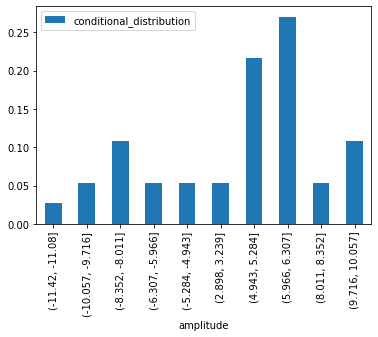

In [59]:
graph.conditional_drawing(conditional_data,3)

---